In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
# Reading in data
ds = pd.read_csv("Social_Network_Ads.csv")

In [4]:
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
X = ds.iloc[:, 2:4].values
age = ds.iloc[:, 2].values
sal = ds.iloc[:, 3].values
y = ds.iloc[:,4].values


In [6]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [8]:
age

array([19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32, 18, 29, 47,
       45, 46, 48, 45, 47, 48, 45, 46, 47, 49, 47, 29, 31, 31, 27, 21, 28,
       27, 35, 33, 30, 26, 27, 27, 33, 35, 30, 28, 23, 25, 27, 30, 31, 24,
       18, 29, 35, 27, 24, 23, 28, 22, 32, 27, 25, 23, 32, 59, 24, 24, 23,
       22, 31, 25, 24, 20, 33, 32, 34, 18, 22, 28, 26, 30, 39, 20, 35, 30,
       31, 24, 28, 26, 35, 22, 30, 26, 29, 29, 35, 35, 28, 35, 28, 27, 28,
       32, 33, 19, 21, 26, 27, 26, 38, 39, 37, 38, 37, 42, 40, 35, 36, 40,
       41, 36, 37, 40, 35, 41, 39, 42, 26, 30, 26, 31, 33, 30, 21, 28, 23,
       20, 30, 28, 19, 19, 18, 35, 30, 34, 24, 27, 41, 29, 20, 26, 41, 31,
       36, 40, 31, 46, 29, 26, 32, 32, 25, 37, 35, 33, 18, 22, 35, 29, 29,
       21, 34, 26, 34, 34, 23, 35, 25, 24, 31, 26, 31, 32, 33, 33, 31, 20,
       33, 35, 28, 24, 19, 29, 19, 28, 34, 30, 20, 26, 35, 35, 49, 39, 41,
       58, 47, 55, 52, 40, 46, 48, 52, 59, 35, 47, 60, 49, 40, 46, 59, 41,
       35, 37, 60, 35, 37

In [9]:
sal

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  80000,
        25000,  26000,  28000,  29000,  22000,  49000,  41000,  22000,
        23000,  20000,  28000,  30000,  43000,  18000,  74000, 137000,
        16000,  44000,  90000,  27000,  28000,  49000,  72000,  31000,
        17000,  51000, 108000,  15000,  84000,  20000,  79000,  54000,
       135000,  89000,  32000,  44000,  83000,  23000,  58000,  55000,
        48000,  79000,  18000, 117000,  20000,  87000,  66000, 120000,
        83000,  58000,  19000,  82000,  63000,  68000,  80000,  27000,
        23000, 113000,  18000, 112000,  52000,  27000,  87000,  17000,
        80000,  42000,  49000,  88000,  62000, 118000,  55000,  85000,
        81000,  50000,  81000, 116000,  15000,  28000,  83000,  44000,
        25000, 123000,  73000,  37000,  88000,  59000,  86000, 149000,
        21000,  72000,  35000,  89000,  86000,  80000,  71000,  71000,
      

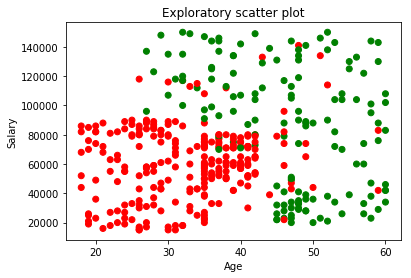

In [10]:
#Initial exploratory plot
plt.figure(1)
plt.scatter(age, sal, color = ['green' if i else 'red' for i in y])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Exploratory scatter plot')
plt.show()

In [11]:
# Splitting and scaling 
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [12]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[55,  3],
       [18, 24]], dtype=int64)

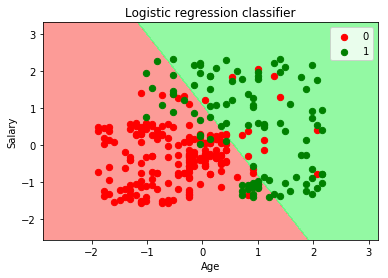

In [15]:
plt.figure(2)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min() - 1, 
                               X_set[:,0].max() + 1, 
                               step = 0.01),
                     np.arange(X_set[:,1].min() - 1, 
                               X_set[:,1].max() + 1, 
                               step = 0.01))
boundary = clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, boundary, alpha = 0.75, 
             cmap = ListedColormap(('#fc7a74', '#6ff785')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1],
                c = ListedColormap(('red', 'green'))(i), 
                label = j, s = 40)
plt.title('Logistic regression classifier')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()